In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import seaborn as sns
import matplotlib.cm as cm
from scipy import stats

In [2]:
# Load the CSV file
file_path = r'Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\no_drug\Analysed Data\2x\Trackmate analysis new 07052024\alpha, D and step sizes_w20\20240118_UGD-2x-2s-replicate1-FOV-2_trackID_195_processed_step_size_w20-wstepflags.csv' 
data = pd.read_csv(file_path)

In [3]:
# Ensure step_flag is boolean and filter for True values
data['step_flag'] = data['step_flag'].astype(str).str.upper() == 'TRUE'

In [4]:
def has_consecutive_true(df, col='step_flag'):
    return df[col].rolling(window=2).apply(lambda x: all(x), raw=True).any()

valid_track_ids = data.groupby('trackID').filter(has_consecutive_true)['trackID'].unique()
if len(valid_track_ids) == 0:
    raise ValueError("No trackIDs found with consecutive TRUE values in step_flag.")

In [5]:
track_id = 195

In [6]:
# track_id = np.random.choice(valid_track_ids, 1)[0]
track_data = data[data['trackID'] == track_id].copy()

In [13]:
# um_per_pixel = 0.117
# track_data['x'] = track_data['x'] * um_per_pixel
# track_data['y'] = track_data['y'] * um_per_pixel

In [14]:
# s_per_frame = 2
# track_data['t'] = track_data['t'] * s_per_frame

In [7]:
# Store results for future access and extract values
stored_track_data = track_data.copy()
stored_random_track_id = track_id
x = track_data['x'].values
y = track_data['y'].values
t = track_data['t'].values

# Debugging: Print x, y, t values
print("Debug information:")
print("Stored Track Data:")
print(stored_track_data)

Debug information:
Stored Track Data:
     trackID          x          y      t  R2_loglog  alpha  D_loglog  \
0        195  35.795500  57.641286    0.0        NaN    NaN       NaN   
1        195  35.810790  57.643472    2.0        NaN    NaN       NaN   
2        195  35.748289  57.626420    4.0        NaN    NaN       NaN   
3        195  35.779825  57.588105    6.0        NaN    NaN       NaN   
4        195  35.765743  57.622542    8.0        NaN    NaN       NaN   
..       ...        ...        ...    ...        ...    ...       ...   
195      195  35.066147  58.980443  390.0        NaN    NaN       NaN   
196      195  35.043979  59.036088  392.0        NaN    NaN       NaN   
197      195  35.133603  58.987121  394.0        NaN    NaN       NaN   
198      195  35.192316  58.998522  396.0        NaN    NaN       NaN   
199      195  35.118890  58.968847  398.0        NaN    NaN       NaN   

     R2_linear  D_linear  step_sizes  mean_step_sizes     x_mean    y_mean  \
0      

x_plot: [ 0.4616084   0.47689893  0.41439821  0.44593362  0.43185214  0.41558164
  0.3590464   0.32364649  0.32054197  0.32933356  0.29986493  0.32467625
  0.27481643  0.30631152  0.28951639  0.29152977  0.31480902  0.30925238
  0.28265674  0.30382969  0.34489401  0.32580335  0.30919077  0.34670388
  0.33898852  0.31522695  0.34362661  0.32106883  0.29099388  0.30014735
  0.30095705  0.30530015  0.29224566  0.26886478  0.26001974  0.17839287
  0.20002998  0.17181511  0.13045356  0.13944682  0.15463701  0.17591318
  0.19732491  0.11746769  0.15062427  0.14333176  0.17624218  0.18589371
  0.24727969  0.21632976  0.24563129  0.26075516  0.27335231  0.29798514
  0.31079587  0.27780463  0.27367373  0.25297684  0.25992257  0.23036423
  0.23419359  0.23787011  0.24517434  0.26882592  0.2403292   0.23499061
  0.27532407  0.29641649  0.25658491  0.24605144  0.2722677   0.2979295
  0.30893119  0.26639484  0.2831583   0.26803616  0.2865633   0.26921288
  0.29443662  0.29633762  0.29113795  0.2903

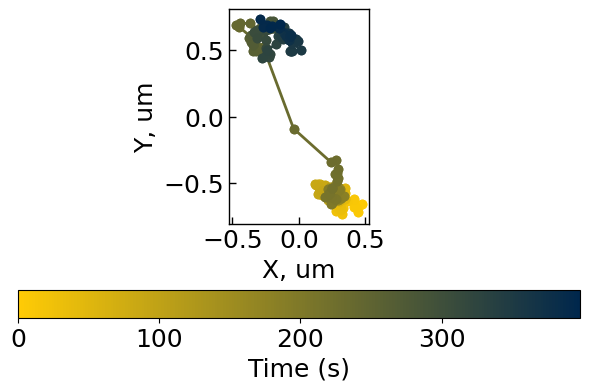

In [8]:
cmap_color_start = "#FFCB05"
cmap_color_end = "#00274C"
cmap_name = "maize2blue"
cmap = clr.LinearSegmentedColormap.from_list(cmap_name, [cmap_color_start, cmap_color_end], N=len(t))
fontsize = 18
x_plot = x - (x.min() + x.max()) / 2
y_plot = y - (y.min() + y.max()) / 2

print(f"x_plot: {x_plot}")
print(f"y_plot: {y_plot}")

fig, ax = plt.subplots(figsize=(6, 4))

# Plot the trajectory with color mapping
for i in range(len(t) - 1):
    ax.plot(
        x_plot[i:i + 2], y_plot[i:i + 2], "-o",
        color=cmap(i / len(t)),
        linewidth=2
    )

# Customize plot aesthetics
ax.axis("scaled")
ax.spines[:].set_linewidth(1)
ax.tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1
)
ax.set_xlabel('X, um', fontsize=18)
ax.set_ylabel('Y, um', fontsize=18)

ax.relim()
ax.autoscale_view()

normalize = clr.Normalize(vmin=t.min(), vmax=t.max())
cbar = plt.colorbar(
    cm.ScalarMappable(norm=normalize, cmap=cmap),
    ax=ax,
    orientation='horizontal',
    pad=0.2,
    drawedges=False
)
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_label('Time (s)', fontsize=18)
# Final layout adjustments and show the plot
plt.tight_layout()
plt.show()

In [9]:
# Extract diffusion coefficient (D) and alpha values from the data
D = track_data['D_linear'].values
alpha = track_data['alpha'].values
step_size = track_data['step_size_w20'].values

# Identify the index of the first TRUE value in step_flag
first_true_index = np.argmax(track_data['step_flag'].values)

# Identify consecutive TRUE indices and their range
consecutive_true_indices = np.where(track_data['step_flag'])[0]
last_true_index = consecutive_true_indices[np.where(np.diff(consecutive_true_indices) != 1)[0][0] + 1] if np.any(np.diff(consecutive_true_indices) != 1) else consecutive_true_indices[-1]

# Define range_start and range_end based on the given criteria
range_start = max(first_true_index - 19, 0)
range_end = min(last_true_index + 19, len(t))

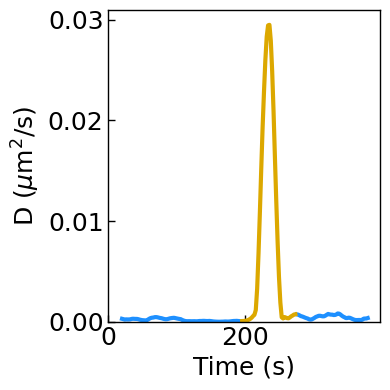

In [13]:
# Plot the diffusion coefficient highlighting the specified range in red
plt.figure(figsize=(4, 4))
# Plot segments outside the red range in blue
plt.plot(t[:range_start], D[:range_start], lw=3, c="dodgerblue")
plt.plot(t[range_end:], D[range_end:], lw=3, c="dodgerblue")
# Plot the segment within the red range in red
plt.plot(t[range_start:range_end], D[range_start:range_end], lw=3, c="#dca800")

plt.xlabel("Time (s)", fontsize=18)
plt.ylabel(r"D ($\mu$m$^2$/s)", fontsize=18)
plt.ylim(0, None)
# plt.gca().yaxis.set_label_coords(-0.10, 0.5)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(axis="both", which="major", labelsize=18, direction="in", bottom=True, left=True, length=5, width=1)
plt.xlim(t[0], t[-1])
plt.tight_layout()
plt.savefig("change_D_rep_track.png", format="png", bbox_inches="tight", dpi=600)
plt.show()

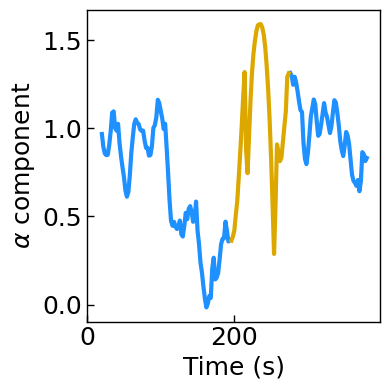

In [14]:
# Plot the alpha component highlighting the specified range in red
plt.figure(figsize=(4, 4))
# Plot segments outside the red range in blue
plt.plot(t[:range_start], alpha[:range_start], lw=3, c="dodgerblue")
plt.plot(t[range_end:], alpha[range_end:], lw=3, c="dodgerblue")
# Plot the segment within the red range in red
plt.plot(t[range_start:range_end], alpha[range_start:range_end], lw=3, c="#dca800")

# plt.axhline(1.1, ls="--", c="gray", lw=2)
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel(r"$\alpha$ component", fontsize=18)
# plt.gca().yaxis.set_label_coords(-0.10, 0.5)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(axis="both", which="major", labelsize=18, direction="in", bottom=True, left=True, length=5, width=1)
plt.xlim(t[0], t[-1])
plt.tight_layout()
plt.savefig("change_alpha_rep_track.png", format="png", bbox_inches="tight", dpi=600)
plt.show()

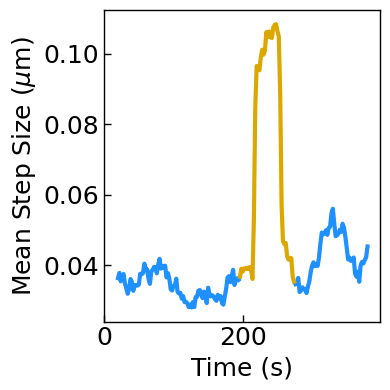

In [15]:
# Plot the step size highlighting the specified range in red
plt.figure(figsize=(4, 4))
# Plot segments outside the red range in blue
plt.plot(t[:range_start], track_data['step_size_w20'].values[:range_start], lw=3, c="dodgerblue")
plt.plot(t[range_end:], track_data['step_size_w20'].values[range_end:], lw=3, c="dodgerblue")
# Plot the segment within the red range in red
plt.plot(t[range_start:range_end], track_data['step_size_w20'].values[range_start:range_end], lw=3, c="#dca800")

plt.xlabel("Time (s)", fontsize=18)
plt.ylabel(r"Mean Step Size ($\mu$m)", fontsize=18)
# plt.gca().yaxis.set_label_coords(-0.09, 0.5)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(axis="both", which="major", labelsize = 18, direction="in", bottom=True, left=True, length=5, width=1)
plt.xlim(t[0], t[-1])
plt.tight_layout()
plt.savefig("change_stepsize_rep_track.png", format="png", bbox_inches="tight", dpi=600)
plt.show()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [6]:
# Load the CSV file
file_path = r'Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\no_drug\Analysed Data\2x\Trackmate analysis new 07052024\alpha, D and step sizes_w20\20240118_UGD-2x-2s-replicate1-FOV-2_processed_step_size_w20.csv'
data = pd.read_csv(file_path)

In [12]:
# Extract relevant data for a specific track ID
track_id = 195
track_data = data[data['trackID'] == track_id].copy()

# Handle NaN values by removing them
track_data = track_data.dropna(subset=['D', 'alpha'])

# Extract cleaned data
t = track_data['t'].values * 2  # Convert frame number to seconds
D = track_data['D'].values
alpha = track_data['alpha'].values
step_size = track_data['step_size_w20'].values

In [16]:
# Determine the range based on the 'step_flag' column
first_true_index = np.argmax(track_data['step_flag'].values)
consecutive_true_indices = np.where(track_data['step_flag'])[0]
last_true_index = (consecutive_true_indices[np.where(np.diff(consecutive_true_indices) != 1)[0][0] + 1] 
                   if np.any(np.diff(consecutive_true_indices) != 1) else consecutive_true_indices[-1])
range_start = max(first_true_index - 19, 0)
range_end = min(last_true_index + 19, len(t))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Model converged: True , Score is 34.36706814446899
Model converged: True , Score is 16.149485085867422
Model converged: True , Score is 259.66695222541125


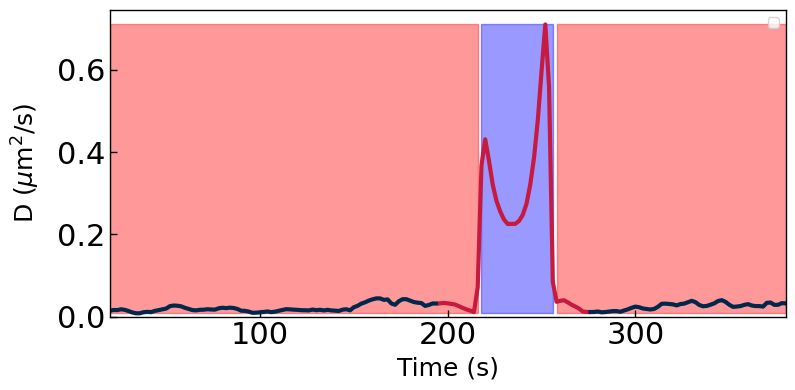

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


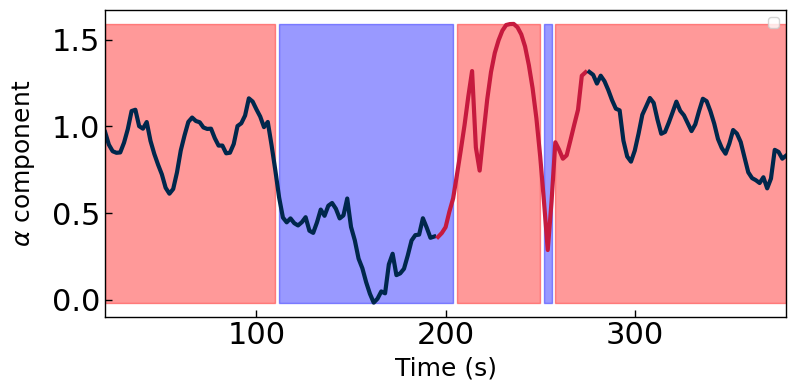

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


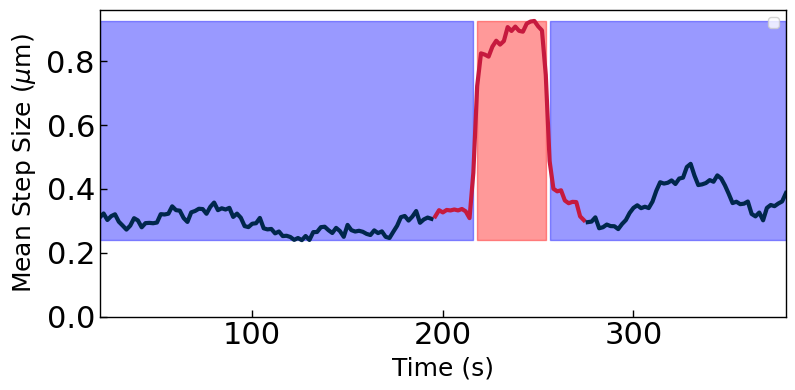

In [59]:
# HMM Prediction Function - Two States
def hmm_predict(data):
    converged = False
    model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=10000)
    while not converged:
        model.fit(data)
        converged = model.monitor_.converged
    print("Model converged:", model.monitor_.converged, ", Score is", model.score(data))
    hmm_result = model.predict(data)
    return hmm_result

# HMM Analysis - Force to two states
arr_log10D = np.log10(D).reshape(-1, 1)
hmm_log10D = hmm_predict(arr_log10D)

# Apply HMM directly to alpha and step_size
hmm_alpha = hmm_predict(alpha.reshape(-1, 1))
hmm_step_size = hmm_predict(step_size.reshape(-1, 1))

# Plot Diffusion Coefficient with Specified Range and HMM Highlighting
plt.figure(figsize=(8, 4))
plt.plot(t[:range_start], D[:range_start], lw=3, c="#00274c")
plt.plot(t[range_start:range_end], D[range_start:range_end], lw=3, c="#c61a3e")
plt.plot(t[range_end:], D[range_end:], lw=3, c="#00274c")
plt.fill_between(t, np.min(D), np.max(D), where=(hmm_log10D == 0), color='blue', alpha=0.4)
plt.fill_between(t, np.min(D), np.max(D), where=(hmm_log10D == 1), color='red', alpha=0.4)
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel(r"D ($\mu$m$^2$/s)", fontsize=18)
plt.ylim(0, None)
plt.gca().yaxis.set_label_coords(-0.10, 0.5)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(axis="both", which="major", labelsize=22, direction="in", bottom=True, left=True, length=5, width=1)
plt.xlim(t[0], t[-1])
plt.legend()
plt.tight_layout()
plt.savefig("change_D_with_HMM.png", format="png", bbox_inches="tight", dpi=600)
plt.show()

# Plot Alpha Component with Specified Range and HMM Highlighting
plt.figure(figsize=(8, 4))
plt.plot(t[:range_start], alpha[:range_start], lw=3, c="#00274c")
plt.plot(t[range_start:range_end], alpha[range_start:range_end], lw=3, c="#c61a3e")
plt.plot(t[range_end:], alpha[range_end:], lw=3, c="#00274c")
plt.fill_between(t, np.min(alpha), np.max(alpha), where=(hmm_alpha == 0), color='blue', alpha=0.4)
plt.fill_between(t, np.min(alpha), np.max(alpha), where=(hmm_alpha == 1), color='red', alpha=0.4)
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel(r"$\alpha$ component", fontsize=18)
plt.gca().yaxis.set_label_coords(-0.10, 0.5)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(axis="both", which="major", labelsize=22, direction="in", bottom=True, left=True, length=5, width=1)
plt.xlim(t[0], t[-1])
plt.legend()
plt.tight_layout()
plt.savefig("change_alpha_with_HMM.png", format="png", bbox_inches="tight", dpi=600)
plt.show()

# Plot Step Size with Specified Range and HMM Highlighting
plt.figure(figsize=(8, 4))
plt.plot(t[:range_start], step_size[:range_start], lw=3, c="#00274c")
plt.plot(t[range_start:range_end], step_size[range_start:range_end], lw=3, c="#c61a3e")
plt.plot(t[range_end:], step_size[range_end:], lw=3, c="#00274c")
plt.fill_between(t, np.min(step_size), np.max(step_size), where=(hmm_step_size == 0), color='blue', alpha=0.4)
plt.fill_between(t, np.min(step_size), np.max(step_size), where=(hmm_step_size == 1), color='red', alpha=0.4)
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel(r"Mean Step Size ($\mu$m)", fontsize=18)
plt.ylim(0, None)
plt.gca().yaxis.set_label_coords(-0.09, 0.5)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(axis="both", which="major", labelsize=22, direction="in", bottom=True, left=True, length=5, width=1)
plt.xlim(t[0], t[-1])
plt.legend()
plt.tight_layout()
plt.savefig("change_stepsize_with_HMM.png", format="png", bbox_inches="tight", dpi=600)
plt.show()